<a href="https://colab.research.google.com/github/isismeira/classificador_com_florestas_aleatorias/blob/main/classifica%C3%A7%C3%A3o_com_florestas_aleat%C3%B3rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador com Florestas Aleatórias

O Random Forest vai induzie uma quantidade X de árvores de decisõ, conforme o parâmetro que será definido e vai criar modelos diferentes com essas árvores, e ele vai escolher o melhor modelo atravé do modelo de votação, escolhendo a que tiver a maior performance

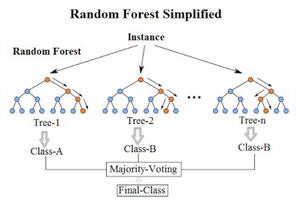

## Importação de bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier # para utilizar as florestas aleatórias

## Conhecendo o dataset

In [3]:
dados = pd.read_csv('Credit.csv')
dados.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
previsores = dados.iloc[:,0:20].values
classe = dados.iloc[:,20].values

## Transformação de Atributos

In [5]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

## Divisão entre treino e teste

In [6]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

## Treinamento e acurácia do modelo

In [ ]:
floresta = RandomForestClassifier(n_estimators = 100) # n_estimators é o número de árvores aleatórias que serão criadas
floresta.fit(X_treinamento, y_treinamento)

In [9]:
floresta.estimators_ # mostra as 100 variações de árvores geradas
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='sqrt', random_state=4628819),
 DecisionTreeClassifier(max_features='sqrt', random_state=1843044501),
 DecisionTreeClassifier(max_features='sqrt', random_state=1233762622),
 DecisionTreeClassifier(max_features='sqrt', random_state=960177379),
 DecisionTreeClassifier(max_features='sqrt', random_state=1944136495),
 DecisionTreeClassifier(max_features='sqrt', random_state=1292606423),
 DecisionTreeClassifier(max_features='sqrt', random_state=1981271578),
 DecisionTreeClassifier(max_features='sqrt', random_state=361535253),
 DecisionTreeClassifier(max_features='sqrt', random_state=523202194),
 DecisionTreeClassifier(max_features='sqrt', random_state=645746253),
 DecisionTreeClassifier(max_features='sqrt', random_state=831698981),
 DecisionTreeClassifier(max_features='sqrt', random_state=38289970),
 DecisionTreeClassifier(max_features='sqrt', random_state=98029489),
 DecisionTreeClassifier(max_features='sqrt', random_state=2113953308),
 DecisionTreeClass

In [10]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.78

78% é o maior que chegamos até agora! Como Random Forest se baseia em um conjuntos de modelos, é muito mais provável obter um classificador com performance melhor